<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Santiago Reyes.

**Fecha:** 27 de septiembre, 2023

**Expediente** : 745826.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    

# Tarea: 4  

## Enunciado de tarea (Transcibirlo)

# Tarea 4 - Compilación de problemas Módulo 1 - Optimización. 
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar la tarea:
- Para resolver la tarea edite este mismo archivo y renómbrelo de la siguiente manera: *E1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1_JaramilloZuluaga*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** 

El telescopio espacial Hubble fue puesto en operación el 24 de abril de 1990 por el trasbordador espacial Discovery. Un modelo para la velocidad del trasbordador durante su misión desde el lanzamiento en $t=0$ hasta que los cohetes auxiliares de combustible sólido se desprenden en el instante $t=126$ , está dado por 

$$v(t) =  0.001302t^3 - 0.09029t^2+23.61t - 3.083$$

(en pies por segundo). Usando este modelo, estime los valores máximo y mínimo absolutos de la aceleración del trasbordador entre el lanzamiento y el desprendimiento de los cohetes auxiliares de combustible sólido. **NOTA: Recuerde que la fórmula de la aceleración es:**

$$a=\frac{dv}{dt}$$

**Punto 1 (15 puntos).** Usando `sympy` encontrar la expresión para la aceleración y los puntos críticos de la misma.

**Solución punto 1.**

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
t = sp.symbols('t')
v = 0.001302*t**3 - 0.09029*t**2 + 23.61*t - 3.083
accel = sp.diff(v,t)
#Expresión de la aceleración
accel

0.003906*t**2 - 0.18058*t + 23.61

In [2]:
p_crit = sp.solve(accel, t)
p_crit

[23.115719406042 - 74.2307912347673*I, 23.115719406042 + 74.2307912347673*I]

In [3]:
p1 = sp.re(p_crit[0])
p2 = sp.re(p_crit[1])
#PUNTOS CRÍTICOS
p1, p2

(23.1157194060420, 23.1157194060420)

**Punto 2 (5 puntos).** Evaluar los puntos críticos y extremos del intervalo y concluir cuáles son la acelaración máxima y mínima, respectivamente y en qué instante de tiempo se presentan.

**Solución punto 2**

In [4]:
seg_der = sp.diff(accel,t)
seg_der

0.007812*t - 0.18058

In [5]:
res = seg_der.subs(t,p1)
res

0

Como el punto crítico evaluado en la segunda derivada es igual a 0, no podemos concluir si es un máximo o un mínimo.

Sin embargo podemos inferir que al ser la aceleración una función de segundo grado (parábola) que abre hacia arriba (el coeficiente de t^2)
es positivo), sabemos que el punto crítico será un mínimo

In [6]:
#Evaluar el mínimo en la acelaración para conocer la aceleración mínima
minim = accel.subs(t,p1)
print("Acelereación mínima = ", minim, "dada en t =", p1)

Acelereación mínima =  21.5228816948285 dada en t = 23.1157194060420


In [7]:
#Evaluar los extremos en la acelaración para conocer la aceleración máxima
extremo1 = 0
extremo2 = 126
max1 = accel.subs(t,extremo1)
max2 = accel.subs(t,extremo2)
if max1 > max2:
    maximum = max1
    extremo = extremo1
else:
    maximum = max2
    extremo = extremo2
print("Acelereación máxima = ", maximum, "dada en t =", extremo)

Acelereación máxima =  62.8685760000000 dada en t = 126


**Punto 3 (10 puntos).** Graficar la aceleración respecto al tiempo junto con los puntos máximos y mínimos encontrados en el punto anterior.

**Solución punto 3.**

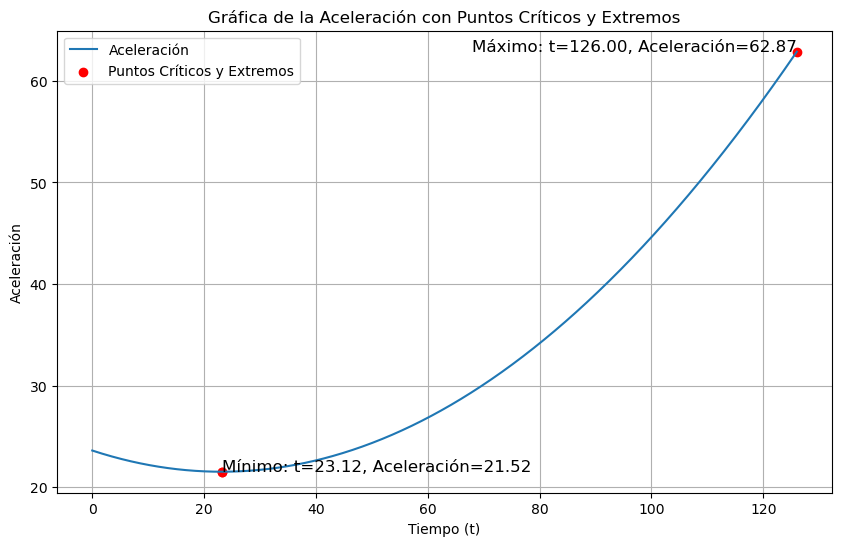

In [84]:
t_values = np.linspace(0, 126, 1000)

acceleration_values = [accel.subs(t, value) for value in t_values]

plt.figure(figsize=(10, 6))
plt.plot(t_values, acceleration_values, label='Aceleración')

plt.scatter([p1, p2, extremo], [accel.subs(t, p1), accel.subs(t, p2), maximum], color='red', label='Puntos Críticos y Extremos')
plt.text(p1, accel.subs(t, p1), f'Mínimo: t={p1:.2f}, Aceleración={accel.subs(t, p1):.2f}', fontsize=12, ha='left')
plt.text(extremo, maximum, f'Máximo: t={extremo:.2f}, Aceleración={maximum:.2f}', fontsize=12, ha='right')


plt.xlabel('Tiempo (t)')
plt.ylabel('Aceleración')
plt.title('Gráfica de la Aceleración con Puntos Críticos y Extremos')
plt.legend()
plt.grid(True)

plt.show()

# Conclusión

Luego de encontrar los máximos y minimos de la aceleración, podemos ver con la mínima aceleración se da en t = 23.12, mientras que la máxima se da en el extremo derecho de la función, es decir en t = 126. Además, podemos ver que la regla de la segunda derivada de vez en cuando requiere otro tipo de enfoque para saber decir si un punto crítico es máximo o mínimo.

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** 

Como gerente de una asociación de empresas para el reciclaje en la región, ha sido asignado para tomar la decisión de a quien debe venderse unos desperdicios de metal que fueron recolectados. Dos empresas: Metales Ltda. y Hierros Unidos, están interesados en la compra de los desperdicios. La primera empresa, que paga la tonelada de metal a: $\$500$ no esta interesada en comprar mas de $500$ $toneladas$., en cambio la segunda, que esta dispuesta a pagar $\$400$ por tonelada de metal, ofrece comprar un límite máximo de $600$ $toneladas$. Sin embargo la financiación local ha limitado las compras formulando la siguiente condición: La cantidad de desperdicio vendida a la empresa Metales Ltda, NO puede superar el doble de la cantidad vendida a Hierros Unidos.

Conociendo que la asociación de empresas dispone de 1.000 toneladas de desperdicios metálicos, formule un modelo de programación lineal que permita alcanzar la mejor decisión para el gerente para obtener la mayor ganancia.

*Variables de decisión*: 

$x_1$ = Cantidad de toneladas de desperdicios a vender a Metales Ltda.

$x_2$ = Cantidad de toneladas de desperdicios a vender a Hierros Unidos.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución punto 1.**

$\text{Para plantear el funcional de costo elegimos dos "x", cada una con el coeficiente resepectivo a el precio de una de las empresa, es decir, 500 y 400.}$
$\text{Se indica que se busca maximizar, de igual manera.}$ 


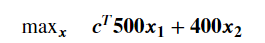

$\text{Posteriormente, tenemos una igualdad, ya que queremos que la suma de ambas cantidades sea igual a 1000}$
$\text{ya que de esta manera nos aseguramos que se vendan todas las toneladas disponibles de la empresa.}$

$\text{Luego entran las desigualdades, en la que la primera "x" no puede superar 500 y la segunda "600".}$

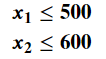

$\text{Finalmente, la única desigualdad faltante es que la primera "x" no puede ser más del doble de la segunda "x"}$
$\text{que si se despeja en una desigualdad resulta así:}$

$\text{Fialmente, el problema queda planteado de la siguiente manera}$

\begin{equation}
\begin{array}{5}
\max_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{500x_1}+\boldsymbol{400x_2} \\
\text{}        & \boldsymbol{x}_{1}+\boldsymbol{x_2}=\boldsymbol{1000}\\
                     & \boldsymbol{x_1}\leq\boldsymbol{500} \\
                     & \boldsymbol{x_2}\leq\boldsymbol{600} \\
                     & \boldsymbol{x_1}\boldsymbol{-2x_2}\leq\boldsymbol{0}
\end{array}
\end{equation}


In [9]:
import numpy as np
import scipy.optimize as opt

In [10]:
#Definición de Matrices 
c = np.array([-500,-400])
b = np.array([500,600,0])
A = np.array([[1,0],
            [0,1],
            [1,-2]])
beq = np.array([1000])
Aeq = np.array([[1, 1]])
bounds = [(0, None), (0, None)]

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos toneladas hay que vender a cada empresa?

**Solución punto 2.**

In [11]:
result = opt.linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=bounds)
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -450000.0
              x: [ 5.000e+02  5.000e+02]
            nit: 0
          lower:  residual: [ 5.000e+02  5.000e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-4.000e+02]
        ineqlin:  residual: [ 0.000e+00  1.000e+02  5.000e+02]
                 marginals: [-1.000e+02 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# Conclusión

La empresa debe de vender 500 toneladas a cada empresa, de esta manera no supera su disponibilidad, ni los límites de compre de cada una. Genera una ganancia de $450,000 vendiendo estas cantidades y se deshace de todos sus desperdicios.

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `population_urban.csv` contiene información histórica anual de México relativa a el % de población urbana.

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [34]:
import pandas as pd
pd.read_csv("population_urban.csv")

,Year,Urban population (% of total)
0,1960,50.753
1,1961,51.590
2,1962,52.428
3,1963,53.265
4,1964,54.100
5,1965,54.931
6,1966,55.761
7,1967,56.587
8,1968,57.411
9,1969,58.229


**Punto 2 (15 puntos).** Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

**En caso de ser necesario, aplique el escalado de características usando el método de normalización**

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [69]:
x = data["Year"].values
y = data["Urban population (% of total)"].values

#Preprocesamiento de los datos
min_x1, min_y1 = min(x), min(y)
max_x1, max_y1 = max(x), max(y)

x_norm = (x - min_x1)/(max_x1 - min_x1)
y_norm = (y - min_y1)/(max_y1 - min_y1)

In [36]:
# Definir funcion objetivo (1)
def obj1(beta, x, y):
    yhat = beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

beta_inicial = np.zeros(2)   #[0,0]
# Resolver
sol1 = opt.minimize(obj1, beta_inicial, args=(x_norm,y_norm))
beta1 = sol1.x

In [37]:
# Definir funcion objetivo (2)
def obj2(beta,x,y):
    yhat = beta[2]*x**2 + beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

beta_inicial = np.zeros(3)
#Resolver
sol2 = opt.minimize(obj2, beta_inicial,args=(x_norm,y_norm))
beta2 = sol2.x

In [38]:
# Definir funcion objetivo (3)
def obj_n(beta, x, y, n):
    yhat = beta.dot([x**i for i in range(n)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = np.zeros(4)
#Resolver
sol3 = opt.minimize(obj_n, beta_inicial, args=(x_norm,y_norm, 4))
beta3 = sol3.x

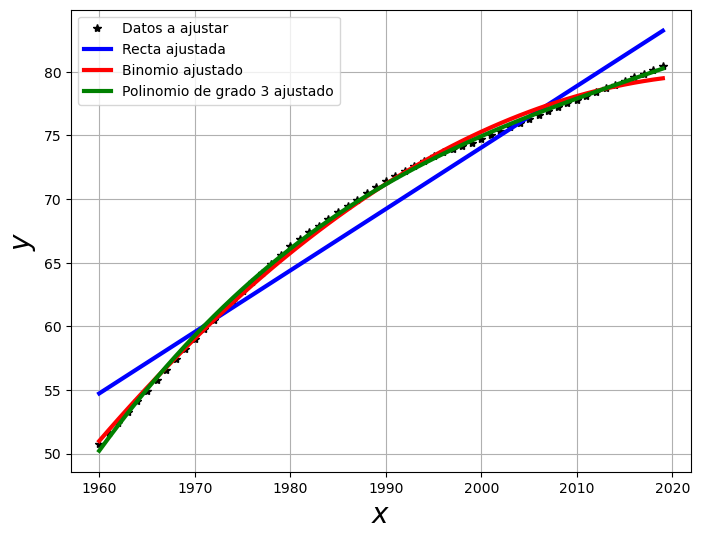

In [85]:
#Yhats
yhat1 = (beta1[1]*x_norm + beta1[0])*(max(y)-min(y)) + min(y)
yhat2 = (beta2[2]*x_norm**2 + beta2[1]*x_norm + beta2[0])*(max(y)-min(y)) + min(y)   
yhat3 = (beta3.dot([x_norm**i for i in range(4)]))*(max_y1 - min_y1) + min_y1

# Graficar
plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x,y,'*k',lw = 10, label='Datos a ajustar')
plt.plot(x,yhat1,'b',lw=3,label='Recta ajustada')
plt.plot(x,yhat2,'r',lw=3,label='Binomio ajustado')
plt.plot(x,yhat3,'g',lw=3,label='Polinomio de grado 3 ajustado')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

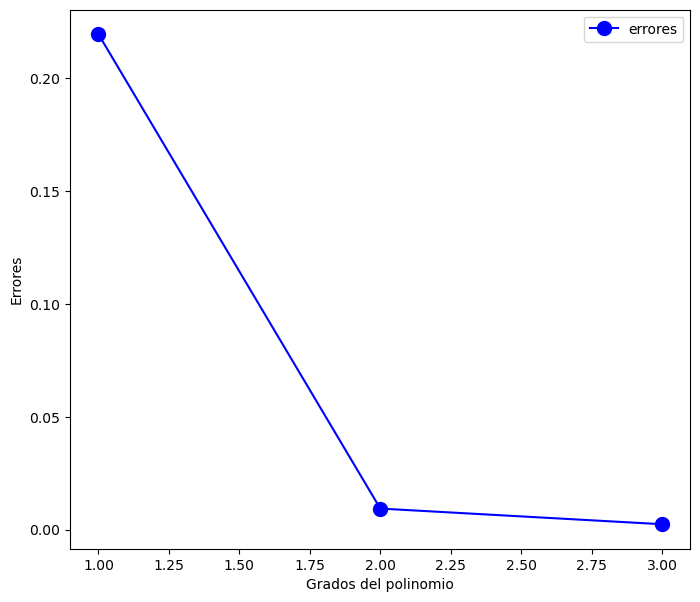

In [57]:
e = [sol1.fun, sol2.fun, sol3.fun]
grados = [1, 2, 3 ]
plt.figure(figsize=(8,7))
plt.plot(grados, e, 'ob-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.show()

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2019  y compare con el dato real 80.444%.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

Usando la regla del codo, vemos como el error cuadrático se ve minimizado a partir del polinomio de 2do grado, por ello lo elegimos para hacer las previsiones futuras.


Eligiendo el polinomio de grado 2:

In [89]:
x = data["Year"].values
y = data["Urban population (% of total)"].values

#Preprocesamiento de los datos
min_x1, min_y1 = min(x), min(y)
max_x1, max_y1 = max(x), max(y)

x_norm = (x - min_x1)/(max_x1 - min_x1)
y_norm = (y - min_y1)/(max_y1 - min_y1)

In [88]:
#Normalizamos el año 2019 al igual que los datos preprocesados
year_2019 = 2019
x_2019_norm = (year_2019 - min_x1) / (max_x1 - min_x1)

In [86]:
# Calcula el porcentaje previsto para el año 2019 sutituyendo en yhat2
y_pred_2019 = (beta2[2] * x_2019_norm**2 + beta2[1] * x_2019_norm + beta2[0]) * (max(y) - min(y)) + min(y)

print(f"El porcentaje previsto para el año 2019 es: {y_pred_2019}%")

El porcentaje previsto para el año 2019 es: 79.49317280781463%


# Conclusiones

Luego de procesar los datos para calcular los distintos coeficientes de cada polinomio, podemos ver como el error cuadrático se minimiza a partir de la parábola, es decir del segundo grado. Con esto, podemos concluir que es una buena idea utilizar esta curva para estimar las previsiones a futuro. 

Para ello, normalizamos el valor del año 2019, lo introducimos en la función acorde a la curva de segundo grado para obtener el valor que puede tener el porcentaje en el futuro. 

Se podría elegir el polinomio de 3er grado, sin embargo los resultados no son tan drásticamente diferentes. 